<a href="https://colab.research.google.com/github/stephen-lin-0/NYC-Taxi/blob/master/460_Final_Project_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Import

This notebook and enviroment is completely hosted on the cloud, and downloads the required files to your Google Drive.  To replicate this analysis:

1.   Make a copy of this Notebook to your Drive, and work in the new copy.
2.   Enter this competition https://www.kaggle.com/c/nyc-taxi-trip-duration/data by clicking on Late Submission.
3.   Download your Kaggle API token by going to My Account -> Create New API Token


In [1]:
! pip install -q kaggle

# Choose the kaggle.json file that you downloaded
from google.colab import files
files.upload()

# Make directory named kaggle and copy kaggle.json file there.
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

# Change the permissions of the file.
! chmod 600 ~/.kaggle/kaggle.json

# Check on data
! kaggle datasets list


Saving kaggle.json to kaggle.json
ref                                                         title                                                size  lastUpdated          downloadCount  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
kimjihoo/coronavirusdataset                                 Coronavirus-Dataset                                  32KB  2020-03-13 13:48:11          12377  
sudalairajkumar/novel-corona-virus-2019-dataset             Novel Corona Virus 2019 Dataset                     348KB  2020-03-12 10:57:12          39544  
rupals/gpu-runtime                                          Segmentation on GPU Kernel Performance Dataset        4MB  2020-03-01 10:04:27            166  
paultimothymooney/coronavirus-genome-sequence               Coronavirus Genome Sequence                           9MB  2020-02-29 00:25:13            163  
imdevskp/sars-outbreak-2003-co

In [2]:
# download the Kaggle data to the remote machine
!kaggle competitions download -c nyc-taxi-trip-duration

 25% 5.00M/20.3M [00:00<00:00, 35.8MB/s]
100% 20.3M/20.3M [00:00<00:00, 80.5MB/s]
  0% 0.00/2.49M [00:00<?, ?B/s]
100% 2.49M/2.49M [00:00<00:00, 170MB/s]
 70% 44.0M/62.9M [00:00<00:00, 100MB/s] 
100% 62.9M/62.9M [00:00<00:00, 142MB/s]


In [3]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import decomposition
from scipy import stats
from sklearn import cluster
from sklearn.neighbors import KNeighborsClassifier
% matplotlib inline
# check current working directory for file traversal
print(os.getcwd())

/content


In [0]:
#unzip the training files
!unzip -qq /content/train.zip -d /content/ 

In [0]:
#unzip the test files
!unzip -qq /content/test.zip -d /content/ 

# 2. Data Exploration

In [0]:
df_taxi = pd.read_csv("train.csv")

In [7]:
df_taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Dictionary


*   id - a unique identifier for each trip
*   pickup_datetime - date and time when the meter was engaged
*   pickup_datetime - date and time when the meter was engaged
*   dropoff_datetime - date and time when the meter was disengaged
*   passenger_count - the number of passengers in the vehicle (driver entered value)
*   pickup_longitude - the longitude where the meter was engaged
*   pickup_latitude - the latitude where the meter was engaged
*   dropoff_longitude - the longitude where the meter was disengaged
*   dropoff_latitude - the latitude where the meter was disengaged
*   store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
*   trip_duration - duration of the trip in seconds

## 2.1 Data Cleaning

In [8]:
df_taxi['pickup_datetime']=pd.to_datetime(df_taxi['pickup_datetime'],errors='coerce')
df_taxi['trip_duration_minutes'] = pd.to_datetime(df_taxi.trip_duration, unit='s').dt.strftime('%M:%S')
df_taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_minutes
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,07:35
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,11:03
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,35:24
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,07:09
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,07:15


In [9]:
print(df_taxi.shape)
print("\n")
print(df_taxi.dtypes)
print("\n")

print("Description of data frame")
print(df_taxi.info())

(1458644, 12)


id                               object
vendor_id                         int64
pickup_datetime          datetime64[ns]
dropoff_datetime                 object
passenger_count                   int64
pickup_longitude                float64
pickup_latitude                 float64
dropoff_longitude               float64
dropoff_latitude                float64
store_and_fwd_flag               object
trip_duration                     int64
trip_duration_minutes            object
dtype: object


Description of data frame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 12 columns):
id                       1458644 non-null object
vendor_id                1458644 non-null int64
pickup_datetime          1458644 non-null datetime64[ns]
dropoff_datetime         1458644 non-null object
passenger_count          1458644 non-null int64
pickup_longitude         1458644 non-null float64
pickup_latitude          1458644 non-null float6

In [10]:
df_taxi.describe

<bound method NDFrame.describe of                 id  vendor_id  ... trip_duration trip_duration_minutes
0        id2875421          2  ...           455                 07:35
1        id2377394          1  ...           663                 11:03
2        id3858529          2  ...          2124                 35:24
3        id3504673          2  ...           429                 07:09
4        id2181028          2  ...           435                 07:15
...            ...        ...  ...           ...                   ...
1458639  id2376096          2  ...           778                 12:58
1458640  id1049543          1  ...           655                 10:55
1458641  id2304944          2  ...           764                 12:44
1458642  id2714485          1  ...           373                 06:13
1458643  id1209952          1  ...           198                 03:18

[1458644 rows x 12 columns]>

In [0]:
df_taxi.pickup_datetime = pd.to_datetime(df_taxi.pickup_datetime)
df_taxi.dropoff_datetime = pd.to_datetime(df_taxi.dropoff_datetime)

In [0]:
df_taxi.dropna(how='any', axis='rows', inplace=True)

# Removing observations with erroneous values
mask = df_taxi['pickup_longitude'].between(-75, -73)
mask &= df_taxi['dropoff_longitude'].between(-75, -73)
mask &= df_taxi['pickup_latitude'].between(40, 42)
mask &= df_taxi['dropoff_latitude'].between(40, 42)
mask &= df_taxi['passenger_count'].between(0, 8)
mask &= df_taxi['trip_duration'].between(60,7200)

df_taxi = df_taxi[mask]

In [13]:
# # month 
# df_taxi['mm_pickup'] = df_taxi.pickup_datetime.dt.month.astype(np.uint8)
# df_taxi['mm_dropoff'] = df_taxi.dropoff_datetime.dt.month.astype(np.uint8)

# # day of week
# df_taxi['dow_pickup'] = df_taxi.pickup_datetime.dt.weekday.astype(np.uint8)
# df_taxi['dow_dropoff'] = df_taxi.dropoff_datetime.dt.weekday.astype(np.uint8)

# # day hour
# df_taxi['hh_pickup'] = df_taxi.pickup_datetime.dt.hour.astype(np.uint8)
# df_taxi['hh_dropoff'] = df_taxi.dropoff_datetime.dt.hour.astype(np.uint8)

df_taxi.loc[:,'mm_pickup'] = df_taxi.pickup_datetime.dt.month.astype(np.uint8)
df_taxi.loc[:,'mm_dropoff'] = df_taxi.dropoff_datetime.dt.month.astype(np.uint8)

df_taxi.loc[:,'dow_pickup'] = df_taxi.pickup_datetime.dt.weekday.astype(np.uint8)
df_taxi.loc[:,'dow_dropoff'] = df_taxi.dropoff_datetime.dt.weekday.astype(np.uint8)

df_taxi.loc[:,'hh_pickup'] = df_taxi.pickup_datetime.dt.hour.astype(np.uint8)
df_taxi.loc[:,'hh_dropoff'] = df_taxi.dropoff_datetime.dt.hour.astype(np.uint8)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [0]:
# calculate-distance-between-two-latitude-longitude-points-haversine-formula 
# return distance in miles
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a)) 

In [15]:
df_taxi['distance_miles'] = distance(df_taxi.pickup_latitude, df_taxi.pickup_longitude, \
                                      df_taxi.dropoff_latitude, df_taxi.dropoff_longitude)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df_taxi.groupby('passenger_count')['distance_miles', 'trip_duration_minutes'].mean()

,distance_miles
passenger_count,
0,2.704759
1,2.112432
2,2.272540
3,2.196573
4,2.257069
5,2.181611
6,2.119359
8,3.698310


Text(0.5, 1.0, 'Histogram ride time in seconds')

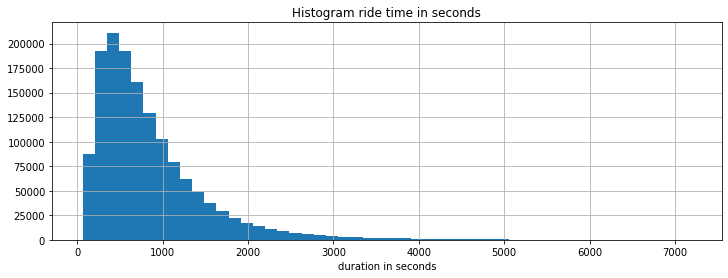

In [17]:
df_taxi.trip_duration.hist(bins=50, figsize=(12,4))
plt.xlabel('duration in seconds')
plt.title('Histogram ride time in seconds')

Text(0.5, 1.0, 'Histogram ride distances in miles')

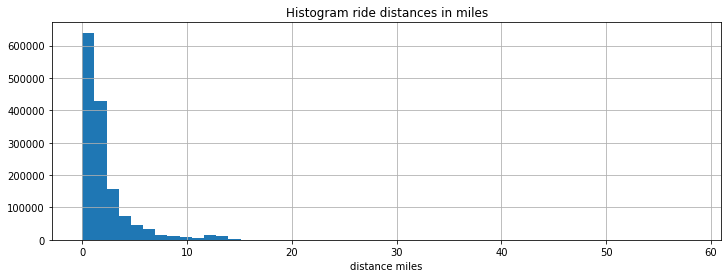

In [18]:
df_taxi.distance_miles.hist(bins=50, figsize=(12,4))
plt.xlabel('distance miles')
plt.title('Histogram ride distances in miles')

In [0]:
boundary={'min_lng':-74.263242,
              'min_lat':40.573143,
              'max_lng':-72.986532, 
              'max_lat':41.709555}

In [20]:
df_taxi.loc[~((df_taxi.pickup_longitude >= boundary['min_lng'] ) & (df_taxi.pickup_longitude <= boundary['max_lng']) &
            (df_taxi.pickup_latitude >= boundary['min_lat']) & (df_taxi.pickup_latitude <= boundary['max_lat']) &
            (df_taxi.dropoff_longitude >= boundary['min_lng']) & (df_taxi.dropoff_longitude <= boundary['max_lng']) &
            (df_taxi.dropoff_latitude >=boundary['min_lat']) & (df_taxi.dropoff_latitude <= boundary['max_lat'])),'is_outlier_loc']=1
df_taxi.loc[((df_taxi.pickup_longitude >= boundary['min_lng'] ) & (df_taxi.pickup_longitude <= boundary['max_lng']) &
            (df_taxi.pickup_latitude >= boundary['min_lat']) & (df_taxi.pickup_latitude <= boundary['max_lat']) &
            (df_taxi.dropoff_longitude >= boundary['min_lng']) & (df_taxi.dropoff_longitude <= boundary['max_lng']) &
            (df_taxi.dropoff_latitude >=boundary['min_lat']) & (df_taxi.dropoff_latitude <= boundary['max_lat'])),'is_outlier_loc']=0

print("Outlier vs Non Outlier Counts")
print(df_taxi['is_outlier_loc'].value_counts())

# Let us drop rows, where location is outlier
df_taxi=df_taxi.loc[df_taxi['is_outlier_loc']==0]
df_taxi.drop(['is_outlier_loc'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Outlier vs Non Outlier Counts
0.0    1447546
1.0        208
Name: is_outlier_loc, dtype: int64


In [0]:
def PickupPlot1(data):
    '''
    Pickup time distribution by hour-of-day
    '''
    plt.figure(figsize=(12,2))

    data = data.groupby('hh_pickup').aggregate({'id':'count'}).reset_index()
    sns.barplot(x='hh_pickup', y='id', data=data)

    plt.title('Pick-ups Hour Distribution')
    plt.xlabel('Hour of Day, 0-23')
    plt.ylabel('No of Trips made')

    plt.savefig('pickups-hour-distribution.png')

def PickupPlot2(data, dow_names):
    '''
    Pickup time distribution by day-of-week
    '''
    plt.figure(figsize=(12,2))

    data = data.groupby('dow_pickup').aggregate({'id':'count'}).reset_index()
    sns.barplot(x='dow_pickup', y='id', data=data)

    plt.title('Pick-ups Weekday Distribution')
    plt.xlabel('Trip Duration, minutes')
    plt.xticks(range(0,7), dow_names, rotation='horizontal')
    plt.ylabel('No of Trips made')

    plt.savefig('pickups-weekday-distribution.png')

def PickupPlot3(data, dow_names):
    '''
    Pickup heatmap of day-of-week vs. hour-of-day
    '''
    plt.figure(figsize=(12,2))
    sns.heatmap(data=pd.crosstab(data.dow_pickup, data.hh_pickup, values=data.vendor_id, aggfunc='count', normalize='index'))

    plt.title('Pickup heatmap, Day-of-Week vs. Day Hour')
    plt.ylabel('Weekday')
    plt.xlabel('Day Hour, 0-23')
    plt.yticks(range(0,7), dow_names[::-1], rotation='horizontal')

    plt.savefig('pickup-heatmap-day-of-week-vs-hour.png')

def TripDurationPlot1(data):
    '''
    Trip duration distribution in minutes
    '''
    plt.figure(figsize=(12,3))

    plt.title('Trip Duration Distribution')
    plt.xlabel('Trip Duration, minutes')
    plt.ylabel('No of Trips made')
    plt.hist(data.trip_duration / 60, bins=100)

    plt.savefig('trip-duration-distribution.png')

def TripDurationPlot2(data, dow_names):
    '''
    Trip duration based on hour-of-day vs. weekday
    '''
    plt.figure(figsize=(12,2))
    sns.heatmap(data=pd.crosstab(data.dow_pickup, data.hh_pickup, values=data.trip_duration/60, aggfunc='mean'))

    plt.title('Trip duration heatmap (Minutes), Day-of-Week vs. Day Hour')
    plt.ylabel('Weekday')
    plt.xlabel('Day Hour, 0-23')
    plt.yticks(range(0,7), dow_names[::-1], rotation='horizontal')

    plt.savefig('trip-duration-heatmap.png')

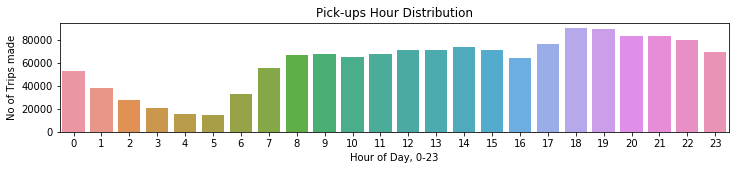

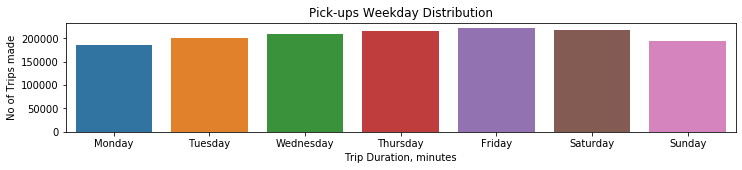

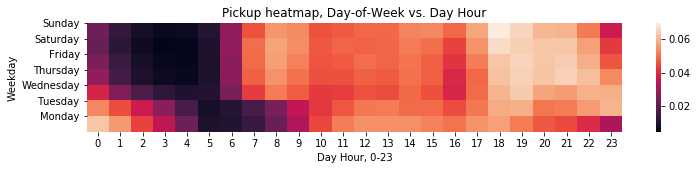

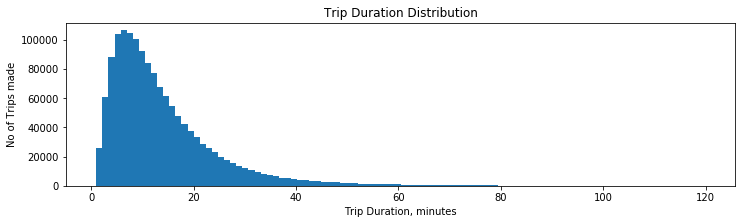

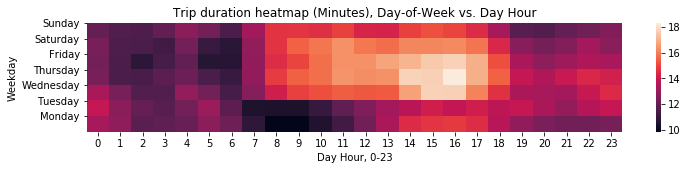

In [22]:
if __name__ == '__main__':
    # Load train data
    taxiDB = df_taxi

    # Let's add some additional columns to speed-up calculations dow names for plot mapping
    dow_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    # Visualization for Pick-Up feature
    PickupPlot1(taxiDB)
    PickupPlot2(taxiDB, dow_names)
    PickupPlot3(taxiDB, dow_names)

    # Visualization for Trip Duration feature
    TripDurationPlot1(taxiDB)
    TripDurationPlot2(taxiDB, dow_names)

In [0]:
# nyc_airports={'JFK':{'min_lng':-73.8352,
#      'min_lat':40.6195,
#      'max_lng':-73.7401, 
#      'max_lat':40.6659},
              
#     'EWR':{'min_lng':-74.1925,
#             'min_lat':40.6700, 
#             'max_lng':-74.1531, 
#             'max_lat':40.7081

#         },
#     'LaGuardia':{'min_lng':-73.8895, 
#                   'min_lat':40.7664, 
#                   'max_lng':-73.8550, 
#                   'max_lat':40.7931
        
#     }
    
# }
# def isAirport(latitude,longitude,airport_name='JFK'):
    
#     if latitude>=nyc_airports[airport_name]['min_lat'] and latitude<=nyc_airports[airport_name]['max_lat'] and longitude>=nyc_airports[airport_name]['min_lng'] and longitude<=nyc_airports[airport_name]['max_lng']:
#         return 1
#     else:
#         return 0

In [0]:
# Maybe use
#df_taxi['is_pickup_JFK']=df_taxi.apply(lambda row:isAirport(row['pickup_latitude'],row['pickup_longitude'],'JFK'),axis=1)
#df_taxi['is_dropoff_JFK']=df_taxi.apply(lambda row:isAirport(row['dropoff_latitude'],row['dropoff_longitude'],'JFK'),axis=1)
#df_taxi['is_pickup_EWR']=df_taxi.apply(lambda row:isAirport(row['pickup_latitude'],row['pickup_longitude'],'EWR'),axis=1)
#df_taxi['is_dropoff_EWR']=df_taxi.apply(lambda row:isAirport(row['dropoff_latitude'],row['dropoff_longitude'],'EWR'),axis=1)
#df_taxi['is_pickup_la_guardia']=df_taxi.apply(lambda row:isAirport(row['pickup_latitude'],row['pickup_longitude'],'LaGuardia'),axis=1)
#df_taxi['is_dropoff_la_guardia']=df_taxi.apply(lambda row:isAirport(row['dropoff_latitude'],row['dropoff_longitude'],'LaGuardia'),axis=1)

In [0]:
data = df_taxi

In [0]:
allLat = np.array(list(data['pickup_latitude']) + list(data['dropoff_latitude']))
allLong = np.array(list(data['pickup_longitude']) + list(data['dropoff_longitude']))

longLimits = [np.percentile(allLong, 0.3), np.percentile(allLong, 99.7)]
latLimits  = [np.percentile(allLat , 0.3), np.percentile(allLat , 99.7)]

data = data[(data['pickup_latitude']   >= latLimits[0] ) & (data['pickup_latitude']   <= latLimits[1]) ]
data = data[(data['dropoff_latitude']  >= latLimits[0] ) & (data['dropoff_latitude']  <= latLimits[1]) ]
data = data[(data['pickup_longitude']  >= longLimits[0]) & (data['pickup_longitude']  <= longLimits[1])]
data = data[(data['dropoff_longitude'] >= longLimits[0]) & (data['dropoff_longitude'] <= longLimits[1])]
data = data.reset_index(drop=True)

allLat = np.array(list(data['pickup_latitude']) + list(data['dropoff_latitude']))
allLong = np.array(list(data['pickup_longitude']) + list(data['dropoff_longitude']))

    # convert fields to sensible units
medianLat = np.percentile(allLat,50)
medianLong = np.percentile(allLong,50)

latMultiplier = 111.32
longMultiplier = np.cos(medianLat*(np.pi/180.0)) * 111.32

data['duration [min]'] = data['trip_duration']/60.0
data['src lat [km]']   = latMultiplier  * (data['pickup_latitude']   - medianLat)
data['src long [km]']  = longMultiplier * (data['pickup_longitude']  - medianLong)
data['dst lat [km]']   = latMultiplier  * (data['dropoff_latitude']  - medianLat)
data['dst long [km]']  = longMultiplier * (data['dropoff_longitude'] - medianLong)

allLat  = np.array(list(data['src lat [km]'])  + list(data['dst lat [km]']))
allLong = np.array(list(data['src long [km]']) + list(data['dst long [km]']))

NameError: ignored

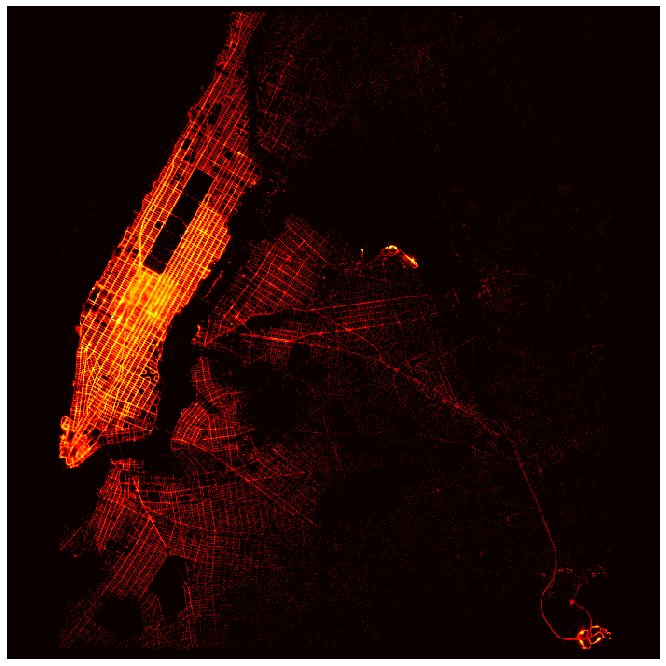

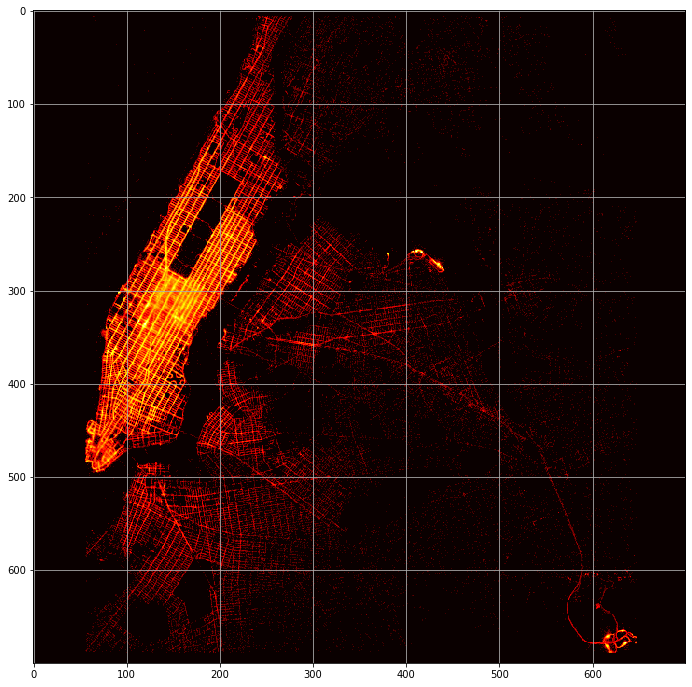

In [27]:
imageSize = (700, 700)
longRange = [-5, 19]
latRange = [-13, 11]

allLatInds  = imageSize[0] - (imageSize[0] * (allLat  - latRange[0])  / (latRange[1]  - latRange[0]) ).astype(int)
allLongInds = (imageSize[1] * (allLong - longRange[0]) / (longRange[1] - longRange[0])).astype(int)

locationDensityImage = np.zeros(imageSize)
for latInd, longInd in zip(allLatInds, allLongInds):
    locationDensityImage[latInd, longInd] += 1

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,12))
ax.imshow(np.log(locationDensityImage + 1), cmap='hot')
ax.set_axis_off()

# plt.savefig('spatial-density-pickup-dropoff.png')

# latInds = imageSize[0] - (imageSize[0] * (latCoord  - latRange[0])  / (latRange[1]  - latRange[0]) ).astype(int)
# longInds = (imageSize[1] * (longCoord - longRange[0]) / (longRange[1] - longRange[0])).astype(int)


# templateTrips = TripKmeansModel.cluster_centers_ * np.tile(stdTripAttr, (numClusters, 1)) + np.tile(meanTripAttr,(numClusters, 1))

# srcCoords = templateTrips[:, :2]
# dstCoords = templateTrips[:, 2:4]

# srcImCoords = ConvertToImageCoords(srcCoords[:, 0],srcCoords[:, 1], latRange, longRange, imageSize)
# dstImCoords = ConvertToImageCoords(dstCoords[:, 0],dstCoords[:, 1], latRange, longRange, imageSize)

plt.figure(figsize=(12,12))
plt.imshow(np.log(locationDensityImage + 1), cmap='hot')
plt.grid('off')
plt.scatter(srcImCoords[1], srcImCoords[0], c='m', s=200, alpha=0.8)
plt.scatter(dstImCoords[1], dstImCoords[0], c='g', s=200, alpha=0.8)

for i in range(len(srcImCoords[0])):
    plt.arrow(srcImCoords[1][i], srcImCoords[0][i],
            dstImCoords[1][i]-srcImCoords[1][i],
            dstImCoords[0][i]-srcImCoords[0][i],
            edgecolor='c', facecolor='c',
            width=0.8,
            alpha=0.4,
            head_width=10.0,
            head_length=10.0,
            length_includes_head=True)

# plt.savefig('typical-trips.png')

In [0]:
### Source -- https://www.kaggle.com/drgilermo/dynamics-of-new-york-city-animation ---- ###
neighborhood = {-74.0019368351: 'Chelsea',-73.837549761: 'Queens',-73.7854240738: 'JFK',-73.9810421975:'Midtown-North-West',-73.9862336241: 'East Village',
                -73.971273324:'Midtown-North-East',-73.9866739677: 'Brooklyn-Park slope',-73.8690098118: 'LaGuardia',-73.9890572967:'Midtown',-74.0081765545: 'Downtown'
                ,-73.9213024854: 'Queens-Astoria',-73.9470256923: 'Harlem',-73.9555565018: 'Upper East Side',
               -73.9453487097: 'Brooklyn-Williamsburg',-73.9745967889:'Upper West Side'}

In [29]:
rides_df = pd.DataFrame(columns = neighborhood.values())
rides_df['name'] = neighborhood.values()

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(np.array(list(neighborhood.keys())).reshape(-1, 1), list(neighborhood.values()))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
df_taxi['pickup_neighborhood'] = neigh.predict(df_taxi.pickup_longitude.values.reshape(-1,1))
df_taxi['dropoff_neighborhood'] = neigh.predict(df_taxi.dropoff_longitude.values.reshape(-1,1))

for col in rides_df.columns[:-1]:
    rides_df[col] = rides_df.name.apply(lambda x: len(df_taxi[(df_taxi.pickup_neighborhood == x) & (df_taxi.dropoff_neighborhood == col)]))

In [31]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

trace = go.Heatmap(z= np.array(rides_df.as_matrix()),
                  x = rides_df.columns[:-1],
                  y = rides_df.columns)
layout = dict(
    title = ' <b>Neighborhood Interaction</b>',
    titlefont = dict(
    size = 30,
    color = ('rgb(100,100,100)')),
    margin = dict(t=100,r=100,b=100,l=150),
        yaxis = dict(
            title = ' <b> From </b>'),
        xaxis = dict(
            title = '<b> To </b>'))
data=[trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labeled-heatmap')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



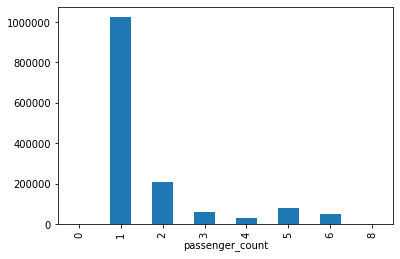

In [32]:
data_passenger = df_taxi['passenger_count'].value_counts().sort_index()
data_passenger.plot(kind='bar')
plt.xlabel('passenger_count')

plt.show()

## 2.2 Demand

We want to sort pickups into high demand neighborhoods/regions.  <br>
We can count the number of pickups at each neighborhood.
We've defined the regions as neighborhoods 

In [0]:
import numpy as np
%matplotlib inline
import glob
import csv
import pandas as pd
import re
import datetime
import glob
import matplotlib.pyplot as plt

In [34]:
print(df_taxi['pickup_neighborhood'].unique())

['Midtown-North-West' 'Downtown' 'Upper West Side' 'Midtown-North-East'
 'Chelsea' 'Midtown' 'Upper East Side' 'East Village'
 'Brooklyn-Williamsburg' 'JFK' 'Harlem' 'LaGuardia' 'Brooklyn-Park slope'
 'Queens-Astoria' 'Queens']


In [35]:
# group by pickup neighborhood, sorted by id counts

# hood_groups = df_taxi.groupby('pickup_neighborhood').count().reset_index()
# hood_groups.sort_values('id', ascending=False)
df_taxi.groupby('pickup_neighborhood')['id'].count().sort_values(ascending=False)

pickup_neighborhood
Midtown                  249075
Midtown-North-West       205869
Upper East Side          165300
Midtown-North-East       164994
Chelsea                  156537
Upper West Side          126719
Downtown                 105106
East Village              87917
Brooklyn-Park slope       48185
LaGuardia                 38919
Harlem                    33093
JFK                       31762
Brooklyn-Williamsburg     21729
Queens-Astoria            11379
Queens                      962
Name: id, dtype: int64

In [36]:
# need to groupby hourly 
# df_taxi[['dow_pickup','hh_pickup','pickup_neighborhood','trip_duration']].groupby(['dow_pickup','hh_pickup']).count()

df_taxi_hood = df_taxi.groupby(['dow_pickup','hh_pickup','pickup_neighborhood']).size().unstack(fill_value=0)
df_taxi_hood

pickup_neighborhood   Brooklyn-Park slope  ...  Upper West Side
dow_pickup hh_pickup                       ...                 
0          0                          184  ...              259
           1                          153  ...              127
           2                           89  ...               69
           3                           74  ...               53
           4                           74  ...               68
...                                   ...  ...              ...
6          19                         349  ...              856
           20                         342  ...              729
           21                         302  ...              670
           22                         310  ...              544
           23                         231  ...              411

[168 rows x 15 columns]

In [44]:
df_taxi.groupby(['dow_pickup','hh_pickup','pickup_neighborhood'], as_index=False).sum()

,dow_pickup,hh_pickup,pickup_neighborhood,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,mm_pickup,mm_dropoff,dow_dropoff,hh_dropoff,distance_miles
0,0,0,Brooklyn-Park slope,271,294,-13613.652832,7496.328667,-13610.628685,7496.849224,118821,671.0,671.0,0.0,29.0,423.604326
1,0,0,Brooklyn-Williamsburg,158,174,-7320.155151,4037.667484,-7320.241440,4037.252987,59073,371.0,371.0,0.0,10.0,190.700155
2,0,0,Chelsea,824,931,-40552.380508,22323.029690,-40540.693893,22325.687031,370383,1928.0,1928.0,0.0,88.0,1320.830519
3,0,0,Downtown,388,388,-19464.117607,10711.390091,-19457.142517,10712.854458,201415,938.0,938.0,0.0,52.0,698.722312
4,0,0,East Village,438,508,-20715.849503,11408.990383,-20712.859337,11410.324097,176114,944.0,944.0,0.0,34.0,597.155783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,6,23,Midtown-North-West,1147,1216,-54967.832603,30279.308830,-54963.160072,30279.267166,454898,2663.0,2666.0,3750.0,14375.0,1400.328253
2513,6,23,Queens,13,15,-590.644264,326.149170,-591.169632,326.270634,9126,33.0,33.0,42.0,161.0,40.628441
2514,6,23,Queens-Astoria,123,134,-6283.169968,3464.006573,-6283.275055,3462.978809,60743,306.0,306.0,408.0,1564.0,187.315690
2515,6,23,Upper East Side,714,775,-34537.986916,19037.352352,-34538.630661,19034.504768,288030,1616.0,1618.0,2442.0,9361.0,960.752803


In [0]:
df_taxi[['hh_pickup','dow_pickup','pickup_neighborhood']].groupbu